# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [13]:
#Starter Code

from bs4 import BeautifulSoup
import requests

### div.album -> "album: (title)"
### a (siblings) -> songs
###
url = 'https://www.azlyrics.com/m/meghantrainor.html' #Put the URL of your AZLyrics Artist Page here!

def get_songs(artist_page_url):
    url = artist_page_url

    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

    #The example from our lecture/reading
    data = [] #Create a storage container
    albums = soup.find_all('div', class_='album')
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
    return data
    
    

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [14]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!
from bs4 import BeautifulSoup
import requests

#Example page
song_url = 'https://www.azlyrics.com/lyrics/meghantrainor/illwakeupforyou.html'

def get_lyrics(song_url):
    html_page = requests.get(song_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main = soup.find('div', {'class': 'container main-page'})
    main2 = main.find('div', {'class': 'row'})
    main3 = main2.find('div', {'class': 'col-xs-12 col-lg-8 text-center'})
    lyrics = main3.findAll('div')[6].text
    return lyrics
    
    

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [15]:
songs = get_songs(url)
print(len(songs))
print(songs[0])

117
("I'll Wake Up For You", '../lyrics/meghantrainor/illwakeupforyou.html', 'album: "Meghan Trainor" (2009)(Self-released album)')


In [17]:
base_url = "https://www.azlyrics.com"
lyrics = []
for song in songs:
    try:
        url_end = song[1].replace('..', '')
        full_url = base_url + url_end
        song_lyrics = get_lyrics(full_url)
        lyrics.append(song_lyrics)
    except:
        lyrics.append("NA")

In [18]:
print(len(songs), len(lyrics))

117 117


In [19]:
import pandas as pd
df = pd.DataFrame(list(zip(songs, lyrics)))
df.head()

,0,1
0,"(I'll Wake Up For You, ../lyrics/meghantrainor...",\n\r\nI'll wake for you\nIn an hour or two\nJu...
1,"(Waterfalls, ../lyrics/meghantrainor/waterfall...","\n\r\nI don't know, I don't know why\nBut it's..."
2,"(Quite The Adventure, ../lyrics/meghantrainor/...","\n\r\nDon't you know it's been too long, since..."
3,"(Locked In Love, ../lyrics/meghantrainor/locke...",\n\r\nI'm losing my way\nCan somebody find the...
4,"(Falling, ../lyrics/meghantrainor/falling.html...","\n\r\nI'm falling, I'm falling, harder than I ..."


In [25]:
row = df.iloc[0]
df['title'] = df[0].map(lambda x: x[0])
df['url'] = df[0].map(lambda x: x[1])
# df['url'] = df[0].map(lambda x: 'https://www.azlyrics.com' + x[1].replace('..', ''))
df['album'] = df[0].map(lambda x: x[2])
df = df.rename(columns={1:'lyrics'})
df.head()

,0,lyrics,title,url,album
0,"(I'll Wake Up For You, ../lyrics/meghantrainor...",\n\r\nI'll wake for you\nIn an hour or two\nJu...,I'll Wake Up For You,../lyrics/meghantrainor/illwakeupforyou.html,"album: ""Meghan Trainor"" (2009)(Self-released a..."
1,"(Waterfalls, ../lyrics/meghantrainor/waterfall...","\n\r\nI don't know, I don't know why\nBut it's...",Waterfalls,../lyrics/meghantrainor/waterfalls.html,"album: ""Meghan Trainor"" (2009)(Self-released a..."
2,"(Quite The Adventure, ../lyrics/meghantrainor/...","\n\r\nDon't you know it's been too long, since...",Quite The Adventure,../lyrics/meghantrainor/quitetheadventure.html,"album: ""Meghan Trainor"" (2009)(Self-released a..."
3,"(Locked In Love, ../lyrics/meghantrainor/locke...",\n\r\nI'm losing my way\nCan somebody find the...,Locked In Love,../lyrics/meghantrainor/lockedinlove.html,"album: ""Meghan Trainor"" (2009)(Self-released a..."
4,"(Falling, ../lyrics/meghantrainor/falling.html...","\n\r\nI'm falling, I'm falling, harder than I ...",Falling,../lyrics/meghantrainor/falling.html,"album: ""Meghan Trainor"" (2009)(Self-released a..."


In [30]:
album = df.iloc[0].album
album

'album: "Meghan Trainor" (2009)(Self-released album)'

In [39]:
import re
df['year'] = df.album.str.extract('(\d\d\d\d)')
df.head()

,0,lyrics,title,url,album,year
0,"(I'll Wake Up For You, ../lyrics/meghantrainor...",\n\r\nI'll wake for you\nIn an hour or two\nJu...,I'll Wake Up For You,../lyrics/meghantrainor/illwakeupforyou.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009
1,"(Waterfalls, ../lyrics/meghantrainor/waterfall...","\n\r\nI don't know, I don't know why\nBut it's...",Waterfalls,../lyrics/meghantrainor/waterfalls.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009
2,"(Quite The Adventure, ../lyrics/meghantrainor/...","\n\r\nDon't you know it's been too long, since...",Quite The Adventure,../lyrics/meghantrainor/quitetheadventure.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009
3,"(Locked In Love, ../lyrics/meghantrainor/locke...",\n\r\nI'm losing my way\nCan somebody find the...,Locked In Love,../lyrics/meghantrainor/lockedinlove.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009
4,"(Falling, ../lyrics/meghantrainor/falling.html...","\n\r\nI'm falling, I'm falling, harder than I ...",Falling,../lyrics/meghantrainor/falling.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009


In [50]:
alb = re.findall(r'"(.*?)"', album)

type(alb)
alb[0]

'Meghan Trainor'

In [51]:
df['album_name'] = df.album.map(lambda x: (re.findall(r'"(.*?)"', x)))
df['album_name'] = df.album_name.str[0]
df.head()

,0,lyrics,title,url,album,year,album_name
0,"(I'll Wake Up For You, ../lyrics/meghantrainor...",\n\r\nI'll wake for you\nIn an hour or two\nJu...,I'll Wake Up For You,../lyrics/meghantrainor/illwakeupforyou.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009,Meghan Trainor
1,"(Waterfalls, ../lyrics/meghantrainor/waterfall...","\n\r\nI don't know, I don't know why\nBut it's...",Waterfalls,../lyrics/meghantrainor/waterfalls.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009,Meghan Trainor
2,"(Quite The Adventure, ../lyrics/meghantrainor/...","\n\r\nDon't you know it's been too long, since...",Quite The Adventure,../lyrics/meghantrainor/quitetheadventure.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009,Meghan Trainor
3,"(Locked In Love, ../lyrics/meghantrainor/locke...",\n\r\nI'm losing my way\nCan somebody find the...,Locked In Love,../lyrics/meghantrainor/lockedinlove.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009,Meghan Trainor
4,"(Falling, ../lyrics/meghantrainor/falling.html...","\n\r\nI'm falling, I'm falling, harder than I ...",Falling,../lyrics/meghantrainor/falling.html,"album: ""Meghan Trainor"" (2009)(Self-released a...",2009,Meghan Trainor


In [57]:
data = df.drop(['album'], axis=1)
data = data.drop([0], axis=1)
print(len(data))
data.head()

117


,lyrics,title,url,year,album_name
0,\n\r\nI'll wake for you\nIn an hour or two\nJu...,I'll Wake Up For You,../lyrics/meghantrainor/illwakeupforyou.html,2009,Meghan Trainor
1,"\n\r\nI don't know, I don't know why\nBut it's...",Waterfalls,../lyrics/meghantrainor/waterfalls.html,2009,Meghan Trainor
2,"\n\r\nDon't you know it's been too long, since...",Quite The Adventure,../lyrics/meghantrainor/quitetheadventure.html,2009,Meghan Trainor
3,\n\r\nI'm losing my way\nCan somebody find the...,Locked In Love,../lyrics/meghantrainor/lockedinlove.html,2009,Meghan Trainor
4,"\n\r\nI'm falling, I'm falling, harder than I ...",Falling,../lyrics/meghantrainor/falling.html,2009,Meghan Trainor


## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [54]:
#Use this block for your code!
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
row = data.iloc[0]
# top = pd.Series(row.lyrics.split()).value_counts()
ten_songs = data.sample(n=10)
ten_songs

,lyrics,title,url,year,album_name
81,"\n\r\nI got champagne problems, champagne prob...",Champagne Problems,../lyrics/meghantrainor/champagneproblems.html,2016,Thank You
24,"\n\r\nWhisper,\nTo your,\nBaby as you say good...",Whisper,../lyrics/meghantrainor/whisper.html,2011,I'll Sing With You
30,NA,,None,2011,I'll Sing With You
54,\n\r\nI got a heart full of rhythm that beats ...,The Best Part (Interlude),../lyrics/meghantrainor/thebestpartinterlude.html,2015,Title
50,\n\r\nBecause you know I'm all about that bass...,All About That Bass,../lyrics/meghantrainor/allaboutthatbass.html,2014,Title
63,"\n\r\nWhat if I, I wanna kiss you tomorrow?\n\...",What If I,../lyrics/meghantrainor/whatifi.html,2015,Title
35,\n\r\nLo-lo-lo-lo-love...\n\nLove's got a hold...,This Love,../lyrics/meghantrainor/thislove.html,2011,Only 17
47,\n\r\nDear future husband\nHere's a few things...,Dear Future Husband,../lyrics/meghantrainor/dearfuturehusband.html,2014,Title
19,\n\r\nFor awhile I \nNever thought I \nEver sm...,I'll Sing With You,../lyrics/meghantrainor/illsingwithyou.html,2011,I'll Sing With You
96,"\n\r\nDamn, I been working real hard on myself...",Treat Myself,../lyrics/meghantrainor/treatmyself.html,2019,Treat Myself


In [62]:
type(ten_songs)

pandas.core.frame.DataFrame

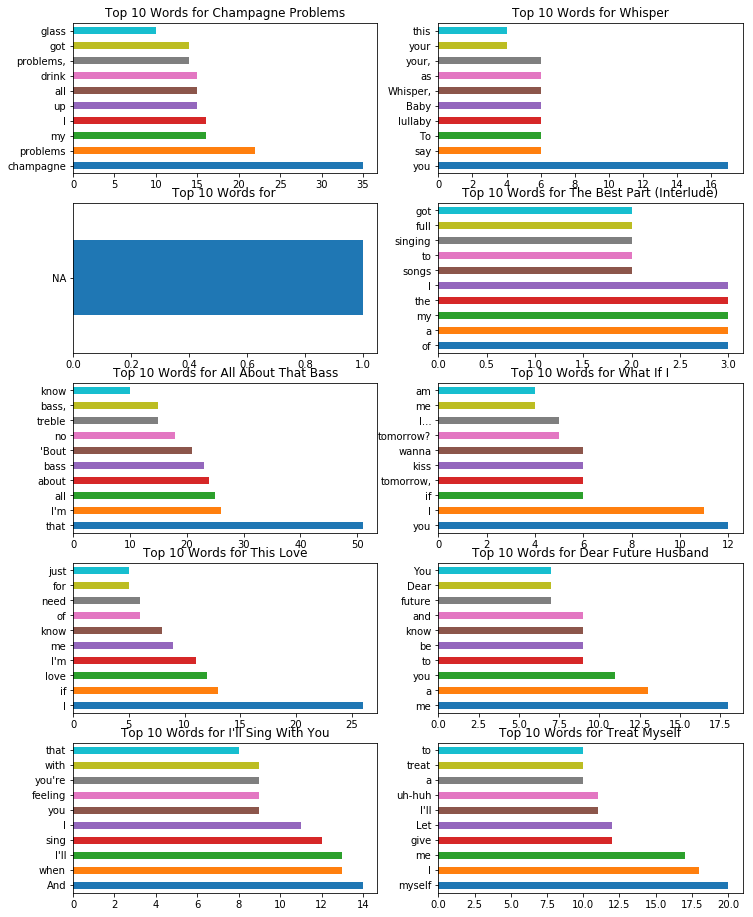

In [86]:
fig, axes = plt.subplots(5,2, figsize=(12,16))

# first = ten_songs.iloc[0]
# print(first)
# top10 = pd.Series(first.lyrics.split()).value_counts()[:10]
# top10.plot(ax=axes[0][0], kind='barh')
# axes[0][0].set_title('Top 10 Words for {}'.format(first.title))

row = 0
col = 0
for index, song in ten_songs.iterrows():
    top10 = pd.Series(song.lyrics.split()).value_counts()[:10]
    top10.plot(ax=axes[row][col], kind='barh')
    axes[row][col].set_title('Top 10 Words for {}'.format(song.title))
    if col == 1:
        row += 1
    if col == 0:
        col = 1
    else:
        col = 0

# i = 0
# for index, song in ten_songs.iterrows():
#     top10 = pd.Series(song.lyrics.split()).value_counts()[:10]
#     top10.plot(ax=axes[i], kind='barh')
#     axes[i].set_title('Top 10 Words for {}'.format(top10.title))
#     i += 1
    

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!